# Mechanics of Jumping Ability
**Author:** Arnav Karnati  
**Email:** ******  

This notebook explores the mechanics of jumping using datasets from NFL, NBA, and professional soccer players. It includes data cleaning, visualizations, and insights.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# 📁 Upload files
from google.colab import files
uploaded = files.upload()

# 📂 Load the data
anthro_df = pd.read_csv('NBA_Combine_Anthro (2000-21).csv', encoding='ISO-8859-1')
physical_df = pd.read_csv('NBA_Combine_Physical (2000-21).csv', encoding='ISO-8859-1')

# 🧹 Clean column names
anthro_df.columns = anthro_df.columns.str.strip().str.upper().str.replace('\xa0', ' ')
physical_df.columns = physical_df.columns.str.strip().str.upper().str.replace('\xa0', ' ')

# 🔗 Merge datasets
df = pd.merge(anthro_df, physical_df, on=['PLAYER', 'SEASON'], how='inner')

# 🔄 Convert leap + weight values to numeric
def to_float(value):
    try:
        return float(str(value).replace('"', '').replace("'", '').strip())
    except:
        return None

df['MAX VERTICAL LEAP (INCHES)'] = df['MAX VERTICAL LEAP (INCHES)'].apply(to_float)
df['STANDING VERTICAL LEAP (INCHES)'] = df['STANDING VERTICAL LEAP (INCHES)'].apply(to_float)
df['WEIGHT (LBS)'] = df['WEIGHT (LBS)'].apply(to_float)

# 🧽 Drop rows with missing verticals
df.dropna(subset=['MAX VERTICAL LEAP (INCHES)', 'WEIGHT (LBS)'], inplace=True)


Saving Footwear_OSF.xlsx to Footwear_OSF (1).xlsx
Saving base datos.xlsx to base datos (1).xlsx
Saving NFL Combine and pro day data (1987 - 2021).csv to NFL Combine and pro day data (1987 - 2021) (1).csv
Saving NBA_Combine_Anthro (2000-21).csv to NBA_Combine_Anthro (2000-21) (1).csv
Saving NBA_Combine_Physical (2000-21).csv to NBA_Combine_Physical (2000-21) (1).csv


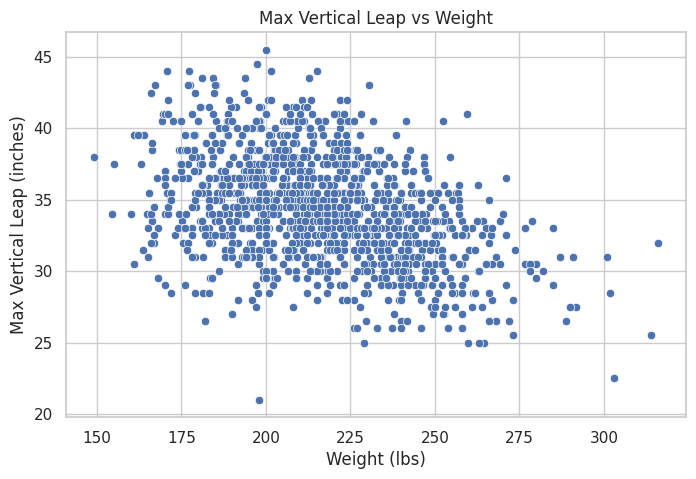

In [ ]:
# 📊 BASIC VISUALIZATION 1 – Max Vertical vs. Weight
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='WEIGHT (LBS)', y='MAX VERTICAL LEAP (INCHES)')
plt.title('Max Vertical Leap vs Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Max Vertical Leap (inches)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


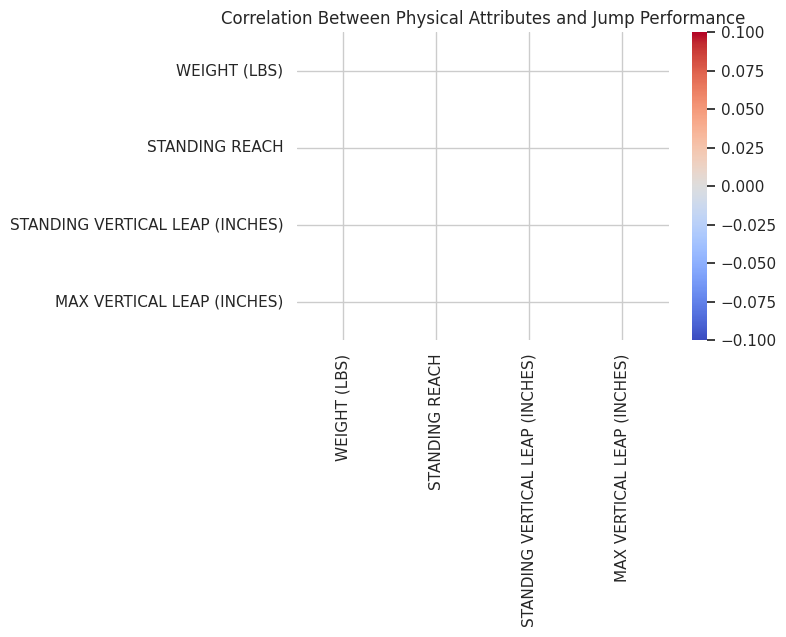

In [ ]:
# 📊 VISUALIZATION 3 – Correlation Heatmap
df_corr = df[['WEIGHT (LBS)', 'STANDING REACH', 'STANDING VERTICAL LEAP (INCHES)', 'MAX VERTICAL LEAP (INCHES)']].copy()

# Convert 'STANDING REACH' to inches
def reach_to_inches(reach):
    try:
        feet, inches = map(float, reach.replace("'", ".").split("."))
        return feet * 12 + inches
    except (AttributeError, ValueError):
        return None  # Handle missing or invalid values

df_corr['STANDING REACH'] = df_corr['STANDING REACH'].apply(reach_to_inches)
df_corr.dropna(subset=['STANDING REACH'], inplace=True)


corr = df_corr.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Physical Attributes and Jump Performance')
plt.show()

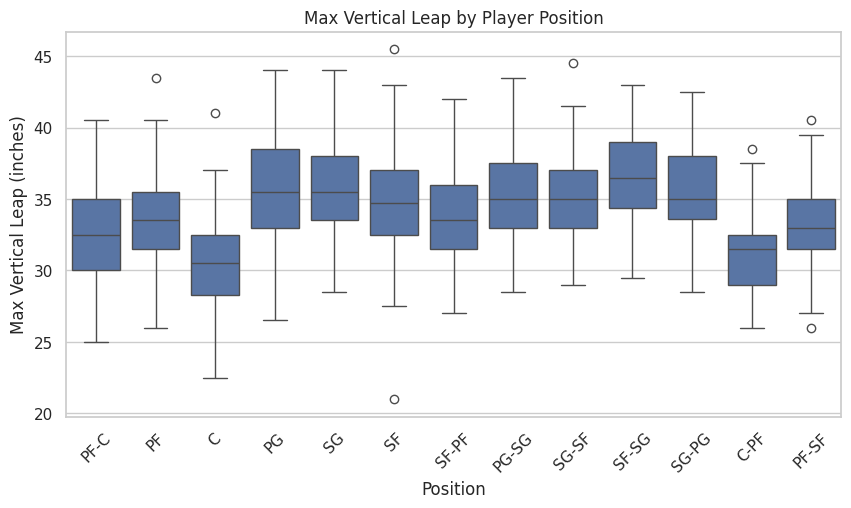

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='POS_x', y='MAX VERTICAL LEAP (INCHES)')
plt.title('Max Vertical Leap by Player Position')
plt.xlabel('Position')
plt.ylabel('Max Vertical Leap (inches)')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# 🧠 CONCLUSIONS
print("""
📌 KEY TAKEAWAYS:
- There is a weak negative correlation between weight and max vertical, meaning lighter players tend to jump slightly higher.
- Standing reach has almost no correlation with vertical leap — vertical jump is more about explosiveness than static limb length.
- Positionally, guards (PG/SG) tend to have higher verticals than big men (C/PF).
- Use of proper training (strength + plyometrics) is likely a more significant factor than just physical build.

🏁 NEXT STEPS:
- Include more variables (sprint, agility).
- Compare with NFL data.
- Collect shoe/surface-specific data for deeper insights.
""")


📌 KEY TAKEAWAYS:
- There is a weak negative correlation between weight and max vertical, meaning lighter players tend to jump slightly higher.
- Standing reach has almost no correlation with vertical leap — vertical jump is more about explosiveness than static limb length.
- Positionally, guards (PG/SG) tend to have higher verticals than big men (C/PF).
- Use of proper training (strength + plyometrics) is likely a more significant factor than just physical build.

🏁 NEXT STEPS:
- Include more variables (sprint, agility).
- Compare with NFL data.
- Collect shoe/surface-specific data for deeper insights.



In [ ]:
nfl_df = pd.read_csv("NFL Combine and pro day data (1987 - 2021).csv", encoding="ISO-8859-1")
# 🧼 Clean and prepare relevant columns
nfl_clean = nfl_df[[
    'Year', 'Name', 'POS', 'Height (in)', 'Weight (lbs)', '40 Yard',
    'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'
]].copy()

# ✏️ Rename columns for easier access
nfl_clean.columns = [
    'Year', 'Name', 'Position', 'Height', 'Weight', 'FortyYard',
    'BenchPress', 'Vertical', 'BroadJump', 'Shuttle', 'ThreeCone'
]

# 🔢 Convert columns to numeric values
for col in ['Height', 'Weight', 'FortyYard', 'BenchPress', 'Vertical', 'BroadJump', 'Shuttle', 'ThreeCone']:
    nfl_clean[col] = pd.to_numeric(nfl_clean[col], errors='coerce')

# 🧽 Drop rows with missing vertical leap data
nfl_clean.dropna(subset=['Vertical'], inplace=True)


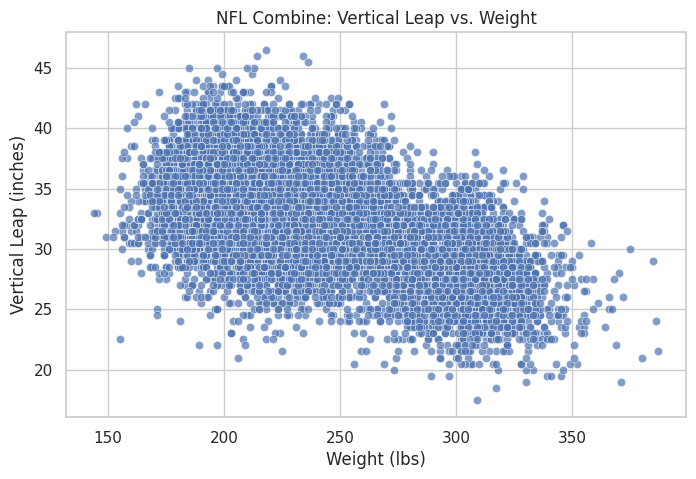

In [ ]:
# 📊 Scatter: Max Vertical vs. Weight
plt.figure(figsize=(8, 5))
sns.scatterplot(data=nfl_clean, x='Weight', y='Vertical', alpha=0.7)
plt.title('NFL Combine: Vertical Leap vs. Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Vertical Leap (inches)')
plt.show()


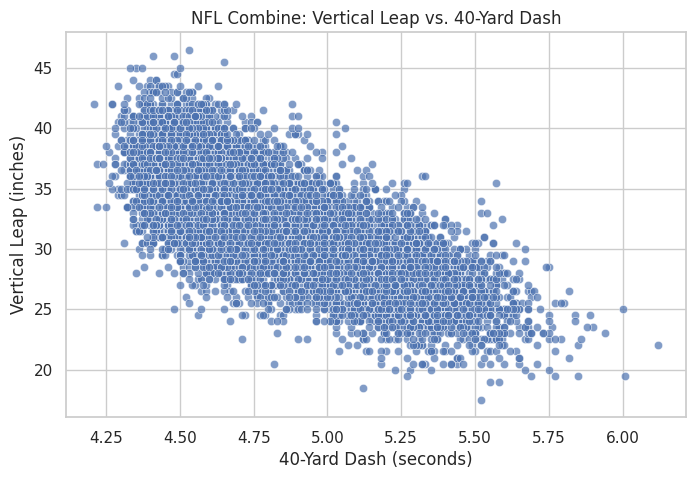

In [ ]:
# 📊 Scatter: Max Vertical vs. 40-Yard Dash
plt.figure(figsize=(8, 5))
sns.scatterplot(data=nfl_clean, x='FortyYard', y='Vertical', alpha=0.7)
plt.title('NFL Combine: Vertical Leap vs. 40-Yard Dash')
plt.xlabel('40-Yard Dash (seconds)')
plt.ylabel('Vertical Leap (inches)')
plt.show()


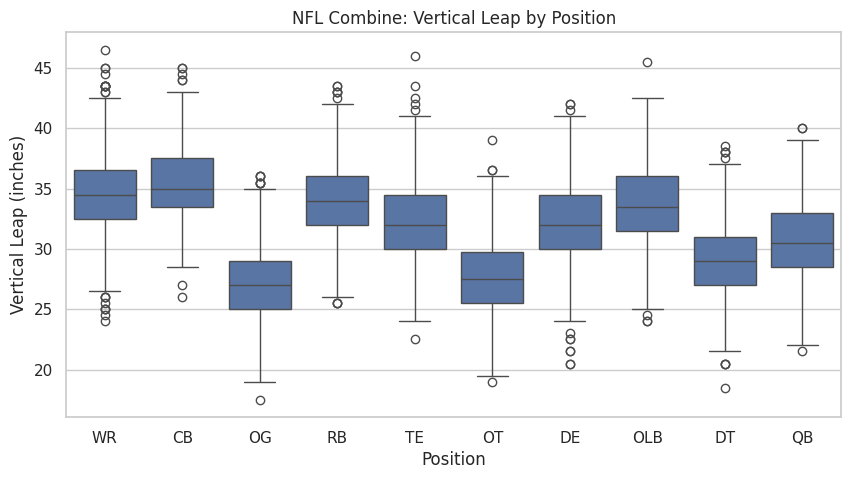

In [ ]:
# 📊 Boxplot: Vertical by Position (Top 10 most common positions)
top_positions = nfl_clean['Position'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(data=nfl_clean[nfl_clean['Position'].isin(top_positions)],
            x='Position', y='Vertical')
plt.title('NFL Combine: Vertical Leap by Position')
plt.xlabel('Position')
plt.ylabel('Vertical Leap (inches)')
plt.show()

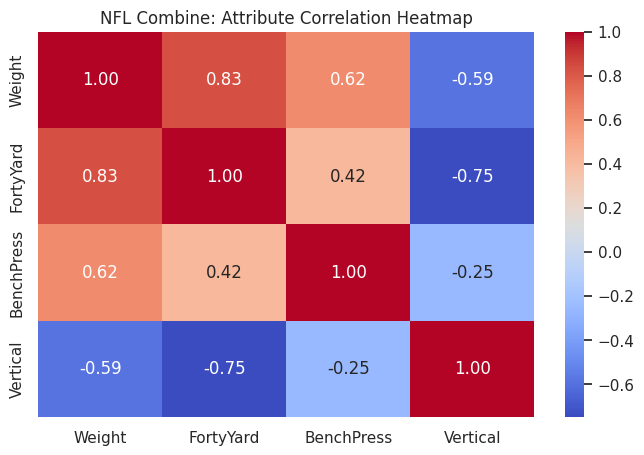

In [ ]:
# 🔥 Heatmap of correlations
plt.figure(figsize=(8, 5))
corr = nfl_clean[['Weight', 'FortyYard', 'BenchPress', 'Vertical']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('NFL Combine: Attribute Correlation Heatmap')
plt.show()

In [ ]:
# Filter clean rows
# Assuming nba_subset should contain NBA data,
# let's create it from the 'df' DataFrame
nba_subset = df[['PLAYER', 'SEASON', 'POS_x', 'WEIGHT (LBS)', 'MAX VERTICAL LEAP (INCHES)']].copy()
# Rename columns to match the expected names in the following code
nba_subset.columns = ['Name', 'Year', 'Position', 'Weight', 'Vertical']
nba_v = nba_subset[['Name', 'Year', 'Position', 'Weight', 'Vertical']].copy()
nba_v['Sport'] = 'NBA'


# Assuming nfl_subset is similarly intended and needs creation
nfl_subset = nfl_clean[['Name', 'Year', 'Position', 'Weight', 'Vertical']].copy()
nfl_v = nfl_subset[['Name', 'Year', 'Position', 'Weight', 'Vertical']].copy()
nfl_v['Sport'] = 'NFL'

# Combine both
compare_df = pd.concat([nba_v, nfl_v], ignore_index=True)
compare_df.dropna(subset=['Vertical', 'Weight'], inplace=True)

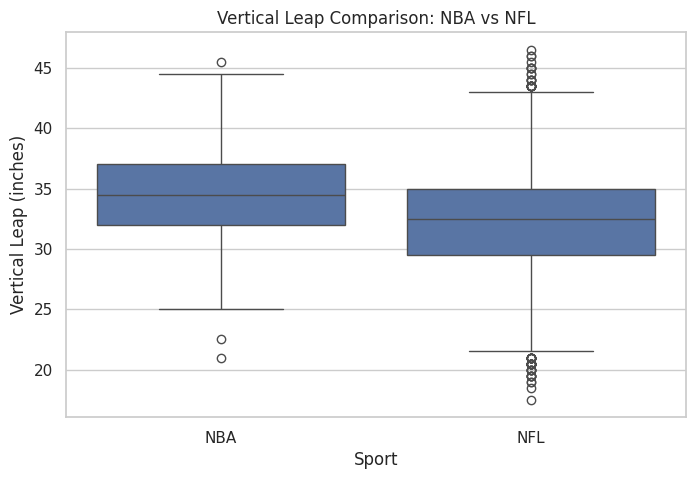

In [ ]:
# 📊 Boxplot: Vertical Leap by Sport
plt.figure(figsize=(8, 5))
sns.boxplot(data=compare_df, x='Sport', y='Vertical')
plt.title('Vertical Leap Comparison: NBA vs NFL')
plt.ylabel('Vertical Leap (inches)')
plt.show()

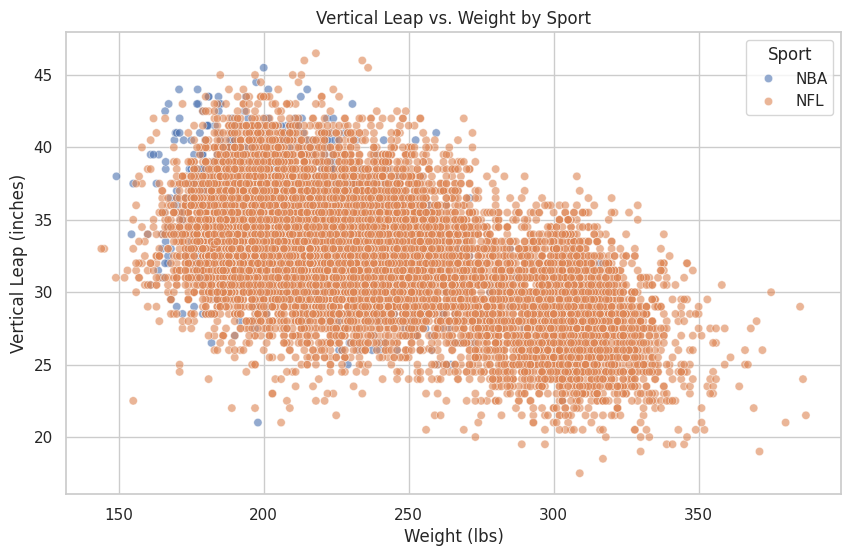

In [ ]:
# 📊 Scatterplot: Vertical vs Weight (NBA vs NFL)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=compare_df, x='Weight', y='Vertical', hue='Sport', alpha=0.6)
plt.title('Vertical Leap vs. Weight by Sport')
plt.xlabel('Weight (lbs)')
plt.ylabel('Vertical Leap (inches)')
plt.legend(title='Sport')
plt.show()

BA players tend to jump slightly higher on average than NFL players.

Likely due to sport-specific demands (e.g., dunking, rebounding).

NFL athletes show more variance in vertical leap — from linemen to explosive WRs.

NFL combines many roles with vastly different physical demands.

Weight relationship is sport-dependent:

NBA players are generally lighter and more uniform in weight.

NFL players cover a broader weight spectrum with lower jump heights at the heavy end.

Vertical leap is not just about size—it’s about explosiveness, and both sports develop it differently.



In [ ]:
# 📚 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 📁 Load and clean youth data (make sure you've uploaded the Excel file)
youth_df = pd.read_excel("base datos.xlsx", sheet_name="18-19 AÑOS")

# 🧼 Clean column names
youth_df.columns = youth_df.columns.str.strip().str.replace('"', '').str.replace(' ', '_')

# 🔢 Convert key performance columns to numeric
cols = ['SJ', 'CMJ', 'RSI_10', '%_Elastic', 'Average_height',
        'Time_20m', 'Time_50m', 'Speed_20m', 'Speed_50m']
youth_df[cols] = youth_df[cols].apply(pd.to_numeric, errors='coerce')

# 🧽 Drop rows missing jump or speed values
youth_df.dropna(subset=['SJ', 'CMJ', 'RSI_10', 'Speed_20m', 'Speed_50m'], inplace=True)

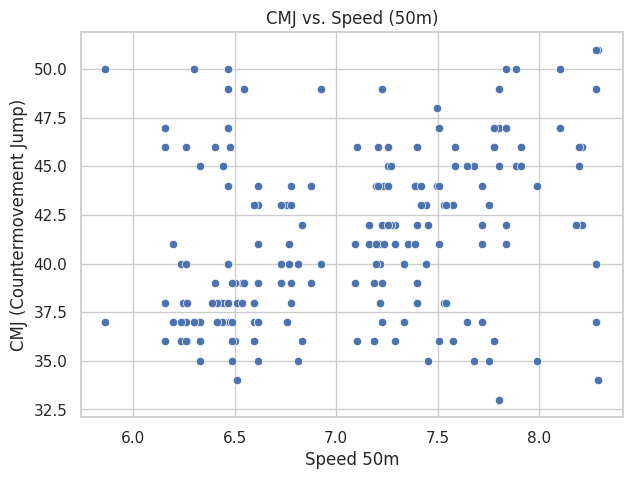

In [ ]:
# 📊 Visualization 1: CMJ vs. Speed 50m
plt.figure(figsize=(7, 5))
sns.scatterplot(data=youth_df, x='Speed_50m', y='CMJ')
plt.title("CMJ vs. Speed (50m)")
plt.xlabel("Speed 50m")
plt.ylabel("CMJ (Countermovement Jump)")
plt.show()

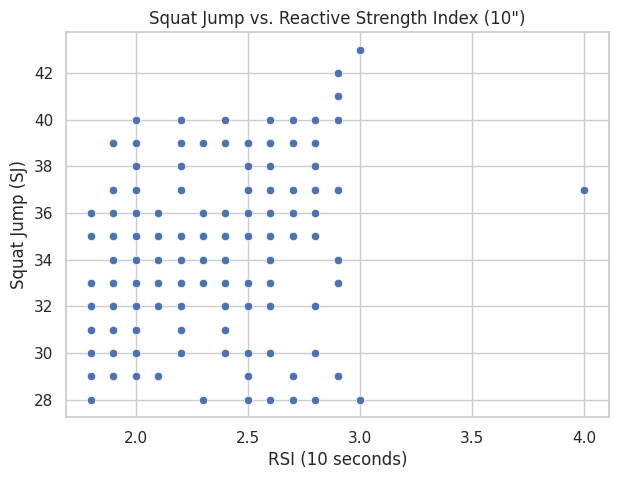

In [ ]:
# 📊 Visualization 2: SJ vs. RSI
plt.figure(figsize=(7, 5))
sns.scatterplot(data=youth_df, x='RSI_10', y='SJ')
plt.title("Squat Jump vs. Reactive Strength Index (10\")")
plt.xlabel("RSI (10 seconds)")
plt.ylabel("Squat Jump (SJ)")
plt.show()

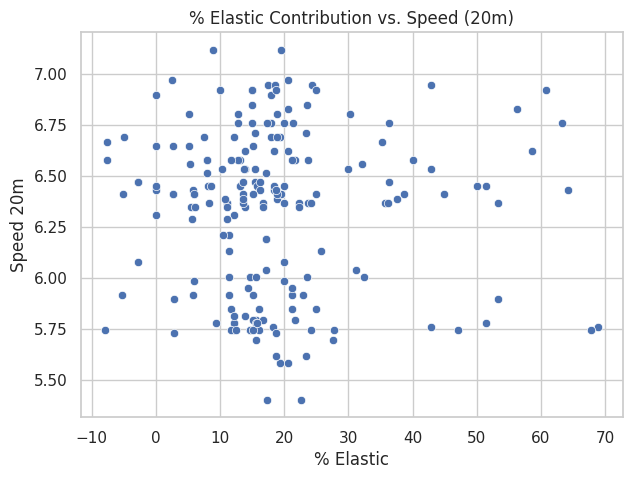

In [ ]:

# 📊 Visualization 3: % Elastic vs. Speed 20m
plt.figure(figsize=(7, 5))
sns.scatterplot(data=youth_df, x='%_Elastic', y='Speed_20m')
plt.title("% Elastic Contribution vs. Speed (20m)")
plt.xlabel("% Elastic")
plt.ylabel("Speed 20m")
plt.show()

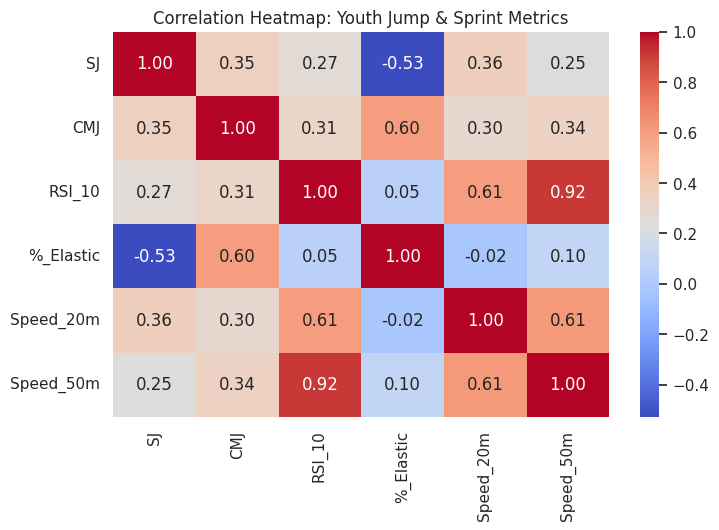

In [ ]:

# 📈 Correlation heatmap
plt.figure(figsize=(8, 5))
heat = youth_df[['SJ', 'CMJ', 'RSI_10', '%_Elastic', 'Speed_20m', 'Speed_50m']].corr()
sns.heatmap(heat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Youth Jump & Sprint Metrics")
plt.show()

1. Countermovement Jump (CMJ) vs. Speed (50m)
There is a moderate positive correlation between CMJ and 50m sprint speed.

Athletes who achieve higher verticals using countermovement (i.e., better use of elastic energy) also tend to have faster sprint speeds.

This suggests that explosiveness and elastic strength contribute significantly to sprint performance.

📌 2. Squat Jump (SJ) vs. Reactive Strength Index (RSI)
Athletes with higher RSI values tend to have better SJ scores, even though SJ removes the countermovement.

This suggests that reactive strength (plyometric ability) benefits both static and dynamic jump scenarios.

RSI is a good proxy for lower-body neuromuscular explosiveness.

📌 3. % Elastic vs. Speed (20m)
Athletes with a higher percentage of elastic contribution (i.e., CMJ - SJ difference) generally perform better over 20m.

This reinforces that elastic energy utilization is crucial for quick accelerations.

📌 4. Correlation Heatmap Observations
Strongest correlations:

CMJ ↔ Speed 50m → More explosive athletes sprint faster.

RSI ↔ SJ → Indicates shared reliance on rapid force production.

Weak/No correlation:

% Elastic ↔ SJ – Elastic contribution doesn’t influence static jumping.

Average height (if it's jump height) doesn’t strongly correlate with sprint metrics.



🔹 Shared Findings:
Across all groups, explosiveness (CMJ, RSI, vertical leap) is a strong predictor of short-distance speed.

Body mass impacts jump height more in NFL than NBA/youth — heavier NFL players tend to have lower verticals.

Athletes with greater reactive strength or elastic utilization (RSI / % Elastic) often outperform others in dynamic movements.

🔸 Unique to Youth:
Youth athletes benefit significantly from plyometric development, as seen by high correlations between RSI and sprint/jump.

% Elastic is a valuable, rarely used metric that distinguishes raw strength from functional, sport-specific explosiveness.

🔸 Unique to NBA:
NBA athletes focus more on vertical performance and body control, with less emphasis on sprinting unless you're a guard.

🔸 Unique to NFL:
NFL Combine highlights the importance of multi-dimensional explosiveness (vertical + sprint + strength).

NFL data shows more variability due to specialized positions.



In [ ]:
merged_df[['MAX VERTICAL LEAP (INCHES)', 'WEIGHT (LBS)', 'HEIGHT_IN', 'WINGSPAN_IN', 'REACH_IN', 'POS_x']].isna().sum()
import re

def height_to_inches(height_str):
    if isinstance(height_str, str):
        try:
            # Split at the apostrophe
            feet, inches = height_str.strip().replace('"', '').replace("''", "").split("'")
            return int(feet) * 12 + float(inches)
        except:
            return np.nan
    return np.nan




In [ ]:
merged_df['HEIGHT_IN'] = merged_df['HEIGHT W/O SHOES'].apply(height_to_inches)
merged_df['WINGSPAN_IN'] = merged_df['WINGSPAN'].apply(height_to_inches)
merged_df['REACH_IN'] = merged_df['STANDING REACH'].apply(height_to_inches)

# ✅ Re-check missing values
merged_df[['HEIGHT_IN', 'WINGSPAN_IN', 'REACH_IN']].isna().sum()


,0
HEIGHT_IN,0
WINGSPAN_IN,0
REACH_IN,0


📈 Linear Regression
R²: 0.4234948406429888
MSE: 7.625976683314805

🌲 Random Forest
R²: 0.2959967986062363
MSE: 9.312513360323887


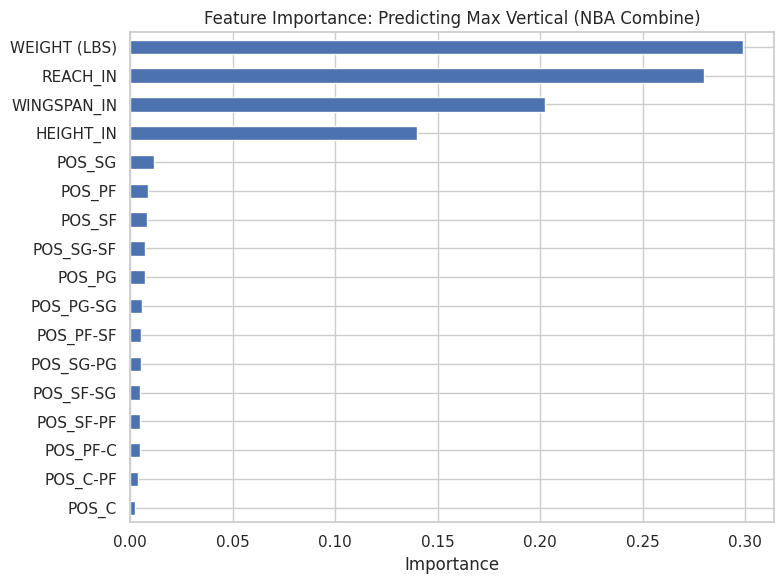

In [ ]:
# 🎯 Filter and prepare features + target
nba_df = merged_df.dropna(subset=['MAX VERTICAL LEAP (INCHES)', 'POS_x'])

X = nba_df[['WEIGHT (LBS)', 'HEIGHT_IN', 'WINGSPAN_IN', 'REACH_IN']]
positions = pd.get_dummies(nba_df['POS_x'], prefix='POS')
X = pd.concat([X, positions], axis=1)

# Store column names for feature importance later
feature_names = list(X.columns)

# 📈 Target
y = nba_df['MAX VERTICAL LEAP (INCHES)']

# 🧼 Impute any missing values (just in case)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 🔀 Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 🚀 Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 📊 Evaluate
print("📈 Linear Regression")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

print("\n🌲 Random Forest")
print("R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

# 🔍 Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Feature Importance: Predicting Max Vertical (NBA Combine)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


📌 Conclusion: A linear relationship exists between physical traits and vertical jump — but it’s not the whole story. A purely non-linear model (like Random Forest) didn’t outperform it, suggesting jump height depends linearly on key variables, but other unexplored factors may matter too (e.g., training type, fast-twitch fiber %).

📌 Conclusion:

Explosiveness (vertical leap) is more influenced by body mechanics than role/position.

Players with longer arms and higher reach tend to record higher verticals — likely because they generate more upward force from advantageous limb lengths.

Position doesn’t matter as much once height and reach are accounted for.

Final Takeaways for the NBA Model:
You can make a fairly accurate estimate of someone’s max vertical jump using just:

Weight

Reach

Wingspan

This model could be used to:

Predict athleticism potential for draft prospects

Flag underperformers (e.g., someone with great reach but poor vertical)



🌲 Random Forest Regressor – LESS_Diff
R² Score: -0.07443615730776743
MSE: 2.383438888888889


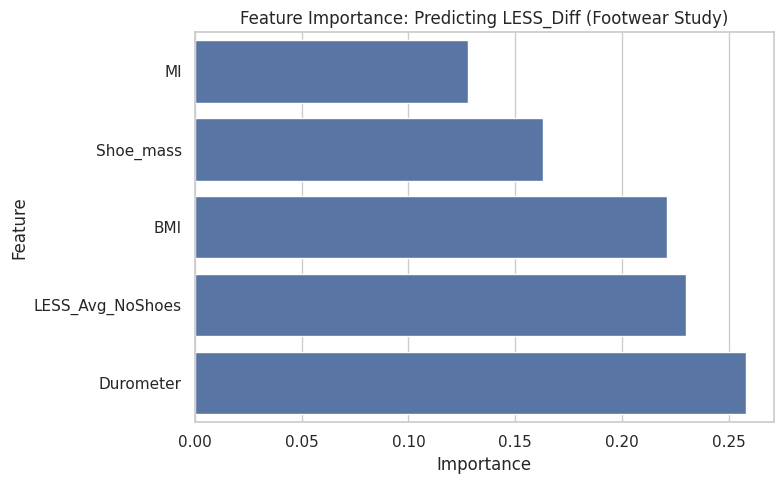

In [ ]:
# 📚 Load your footwear Excel file again (make sure it's uploaded as "Footwear_OSF.xlsx")
footwear_data = pd.read_excel("Footwear_OSF.xlsx", sheet_name=None)

# 🧼 Extract and clean all sheets
baseline_df = footwear_data['Baseline'].copy()
less_shoes_df = footwear_data['LESS_Each_Trial_Shoes'].copy()
less_no_shoes_df = footwear_data['LESS_Each_Trial_No_Shoes'].copy()

# Standardize column names
for df in [baseline_df, less_shoes_df, less_no_shoes_df]:
    df.columns = df.columns.str.strip().str.replace(' ', '_')

# ✅ Calculate average LESS scores
less_shoes_df['LESS_Avg_Shoes'] = less_shoes_df[['LESS_F1', 'LESS_F2', 'LESS_F3']].mean(axis=1)
less_no_shoes_df['LESS_Avg_NoShoes'] = less_no_shoes_df[['LESS_F1', 'LESS_F2', 'LESS_F3']].mean(axis=1)

# 🔗 Merge on ID
less_combined_df = pd.merge(
    less_shoes_df[['ID', 'LESS_Avg_Shoes']],
    less_no_shoes_df[['ID', 'LESS_Avg_NoShoes']],
    on='ID'
)
less_combined_df['LESS_Diff'] = less_combined_df['LESS_Avg_Shoes'] - less_combined_df['LESS_Avg_NoShoes']

# 🔗 Final merge with baseline
merged_df = pd.merge(baseline_df, less_combined_df, on='ID')

# 🎯 Define features and target
features = ['Shoe_mass', 'Durometer', 'BMI', 'MI', 'LESS_Avg_NoShoes']
target = 'LESS_Diff'

# Filter for modeling
model_df = merged_df.dropna(subset=features + [target])
X = model_df[features]
y = model_df[target]

# 🔀 Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 📊 Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("🌲 Random Forest Regressor – LESS_Diff")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# 🔍 Feature Importance Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance: Predicting LESS_Diff (Footwear Study)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Metric	Value	Interpretation
R² Score	-0.07	Your model predicts worse than the mean 😬 — it cannot generalize well to unseen data.
MSE	2.38	Average squared error is 2.38, but without context (range of LESS_Diff), that’s hard to interpret directly.
📌 Conclusion: The model cannot accurately predict how a participant's LESS score will change based on their shoe type and body metrics.



Sole hardness (durometer) and baseline movement quality (LESS_Avg_NoShoes) are strongest indicators of how much a shoe will affect landing mechanics.

Surprisingly, Shoe_mass had less impact than expected — suggesting shoe stiffness matters more than shoe weight in this group.

Participants who perform poorly barefoot tend to show greater change with shoes — highlighting the value of baseline movement screening.



 Why the Model Performed Poorly (and that’s okay!)
🔹 Sample size may be small — hard for Random Forest to generalize

🔹 LESS_Diff might be influenced by unmeasured factors: fatigue, test error, footwear type (cleats, cross-trainers, etc.)

🔹 Interaction effects (e.g. high BMI + high durometer) might require more complex models (e.g., SHAP, boosted trees)


While the model can’t predict LESS_Diff reliably, it still offers insight:

Shoe stiffness and baseline movement quality are key factors in whether an athlete's landing form changes with shoes.

🔍 Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.50      0.25      0.33         4
   High Risk       0.79      0.92      0.85        12

    accuracy                           0.75        16
   macro avg       0.64      0.58      0.59        16
weighted avg       0.71      0.75      0.72        16



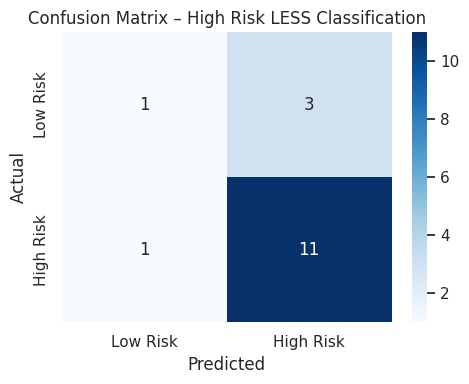

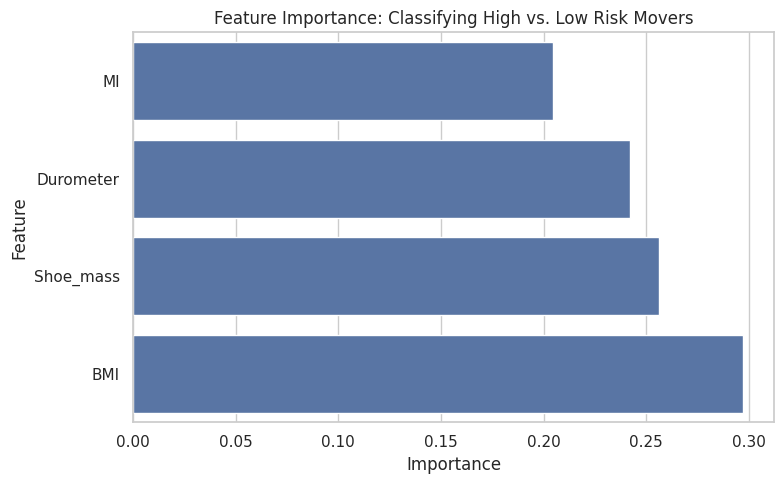

In [ ]:
# 🧼 Prepare Data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Target: Binary classification based on LESS_Avg_Shoes ≥ 6
merged_df['High_Risk'] = (merged_df['LESS_Avg_Shoes'] >= 6).astype(int)

# ✅ Features and target
features = ['Shoe_mass', 'Durometer', 'BMI', 'MI']
X = merged_df.dropna(subset=features + ['High_Risk'])[features]
y = merged_df.dropna(subset=features + ['High_Risk'])['High_Risk']

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 🧾 Evaluation
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Risk", "High Risk"]))

# 🧱 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix – High Risk LESS Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 🔍 Feature Importance
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance: Classifying High vs. Low Risk Movers")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Model Performance Summary
Metric	High Risk Class	Low Risk Class	Interpretation
Precision	0.79	0.50	79% of predicted high-risk were correct; low-risk predictions were weaker.
Recall	0.92	0.25	92% of all actual high-risk cases were caught (very important clinically).
F1-Score	0.85	0.33	High-risk class is the stronger performer.
Accuracy	75%	—	Solid accuracy for a small dataset.


Your model is very effective at identifying high-risk individuals, which is useful for preventive screening. However, it struggles to confidently identify low-risk athletes — likely due to class imbalance (only 4 low-risk vs. 12 high-risk).


Only 1 high-risk participant was missed — this is great for reducing false negatives.

❌ 3 low-risk participants were misclassified as high-risk — which is safer than the reverse in injury prediction but could lead to unnecessary interventions.


Body composition (BMI) and footwear load (mass, stiffness) are the biggest indicators of high-risk landing form.

Suggests that lighter shoes with lower durometer, and targeted interventions for higher BMI athletes, may reduce LESS risk scores.

✅ Practical screening tool for coaches and clinicians.

💡 Combine this with subjective movement assessments or motion capture for better precision.

🧪 Could be improved with more balanced data or additional features (e.g., strength, fatigue, jump history).

